# Ontdekken van gek webverkeer
Het doel van dit project is het vinden van anomalieÃ«n in het webverkeer uit verschillende regio's. Idealiter wil de IT-afdeling weten wanneer we pieken in de gegevens zien, zodat ze preventief het webbeveiligingsteam kunnen inzetten. Ze denken dat als het aantal hits boven de 190 komt, het een goede indicator is dat er iets vreemds gebeurt.

<p><strong>Goal</strong> - Ontdek anomalieÃ«n in webverkeer</p>
<p><strong>Data</strong> - Web verkeer per hosting region in de tijd</p>
<p><strong>Task</strong> - Unsupervised anomaly detection</p>

# 1. Import Data

In [1]:
# importeren
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# importeren van data
df = pd.read_csv('dataset.csv')

In [3]:
# check 
df.head()

Date    Region 1    Region 2    Region 3    Region 4    Region 5  \
0  1/1/2021  123.594462  179.799106  142.051377  165.898948  211.796438   
1  2/1/2021   96.913589  142.312297   98.873977  160.450595  126.403444   
2  3/1/2021  127.769080  205.521667  102.443675  127.585609  243.919837   
3  4/1/2021  232.383608  157.833057  151.695219  184.958764  112.802699   
4  5/1/2021  121.971639  166.400354  139.208040  105.576656   91.234096   

     Region 6  
0  140.574596  
1  146.323197  
2  211.321143  
3  169.354083  
4  221.821293

# 2. Splitten van dat om Data Snooping Bias de voorkomen

In [4]:
# importeren
from sklearn.model_selection import train_test_split

In [5]:
# splitten
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [6]:
# check
print(train.shape)
print(test.shape)

(368, 7)
(158, 7)


In [7]:
train.head()

Date    Region 1    Region 2    Region 3    Region 4    Region 5  \
436  13/3/2022  158.992329  103.595983  208.664219  128.352544  156.223776   
470  16/4/2022  148.618546  231.350464  782.000000  103.716711  158.796185   
521   6/6/2022  217.863557  181.198188   39.779913  182.967647  214.980495   
118  29/4/2021  164.808437  102.842019   53.699011  214.959871   44.470706   
162  12/6/2021  248.582870  130.898347  143.994442   96.685363  180.243516   

       Region 6  
436  262.221418  
470  109.755732  
521  150.621250  
118  189.192559  
162  165.263077

In [8]:
test.head()

Date    Region 1    Region 2    Region 3    Region 4    Region 5  \
261   19/9/2021  174.982473  188.073353  212.564889  227.348706   90.856875   
425    2/3/2022  155.830214  137.432916  165.569703  110.725701  123.453509   
21    22/1/2021  116.924514   83.170321   83.832043  131.375901  213.164326   
329  26/11/2021  189.518384  134.788869  161.219281   85.183524  124.251407   
310   7/11/2021  136.550482  158.632527  234.408947  168.732082  173.253947   

       Region 6  
261  228.446842  
425  159.390772  
21    71.697156  
329  157.197199  
310   69.403637

# 3. Exploratory Data Analysis (EDA)

## Algemene EDA

In [9]:
# type
train.dtypes

Date         object
Region 1    float64
Region 2    float64
Region 3    float64
Region 4    float64
Region 5    float64
Region 6    float64
dtype: object

In [10]:
# null values
train.isnull().sum()

Date        0
Region 1    0
Region 2    0
Region 3    0
Region 4    0
Region 5    0
Region 6    0
dtype: int64

In [11]:
# statistisch
train.describe()

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6
count  368.000000  368.000000  368.000000  368.000000  368.000000  368.000000
mean   151.128974  167.734819  155.862138  157.182245  161.480763  153.131734
std     51.369861   95.484190   80.129220   71.864944   91.850797   52.667582
min     11.184334    7.461471   -8.153494   -9.810526  -19.235141   -9.713714
25%    118.151654  126.804343  115.367657  121.458658  117.213061  119.523299
50%    150.579649  152.687679  147.487873  152.710155  151.404897  150.309562
75%    183.908133  192.515750  182.791165  188.930369  184.605039  185.003355
max    505.000000  784.000000  782.000000  723.000000  759.000000  404.000000

In [12]:
# 1.5 IQR rule van Region 4, checken van outlier
188+1.5*(188-121)

288.5

In [13]:
# 1.5 IQR rule van Region 2, checken van outlier
192+1.5*(192-126)

291.0

## Plot Distributions

In [14]:
# importern
from pandas.plotting import scatter_matrix

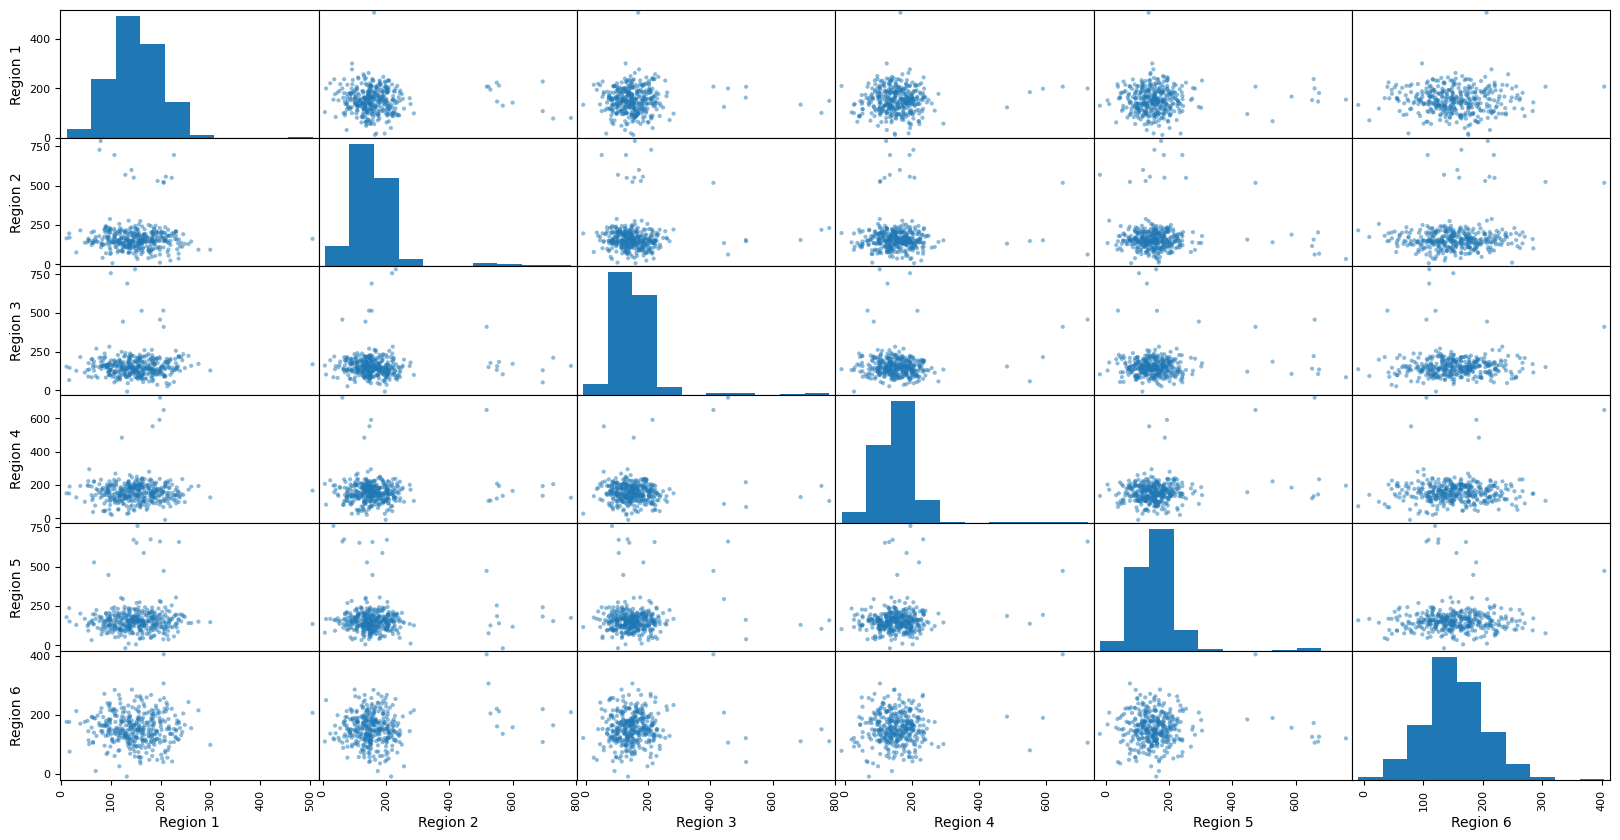

In [15]:
# plot scatter matrix
scatter_matrix(train, figsize=(20,10))
plt.show()

## Fix Date Column met juiste datatype

In [16]:
# type
train.dtypes

Date         object
Region 1    float64
Region 2    float64
Region 3    float64
Region 4    float64
Region 5    float64
Region 6    float64
dtype: object

In [17]:
# zet om naar datetime
train['Date'] = pd.to_datetime(train['Date'], format="%d/%m/%Y")

In [18]:
# check type
train.dtypes

Date        datetime64[ns]
Region 1           float64
Region 2           float64
Region 3           float64
Region 4           float64
Region 5           float64
Region 6           float64
dtype: object

## Visualiseer anomalieÃ«n?

In [19]:
# importeren
import seaborn as sns

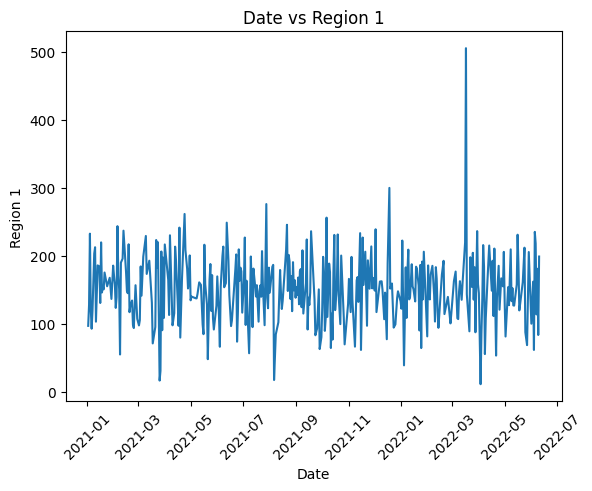

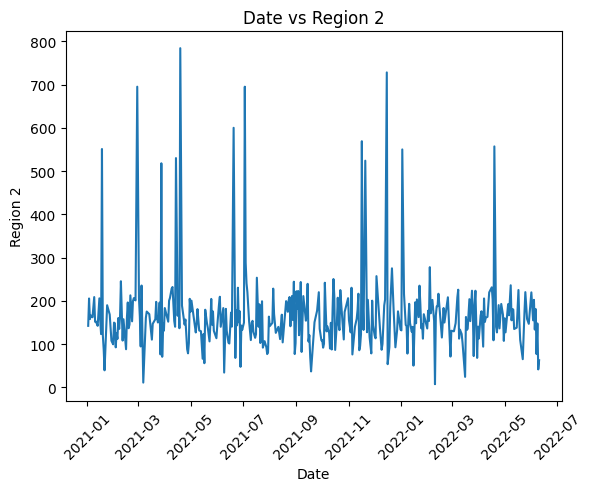

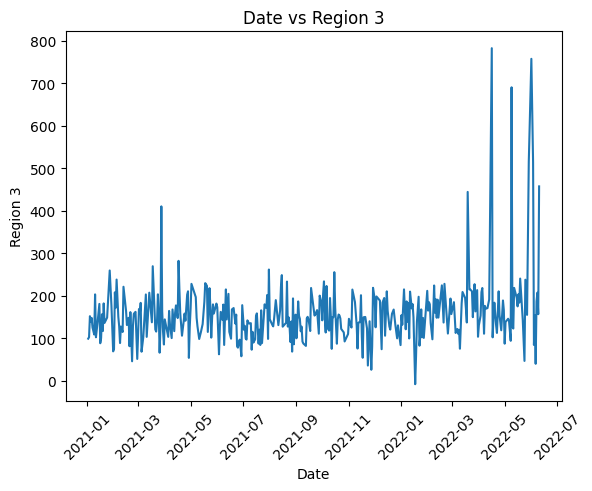

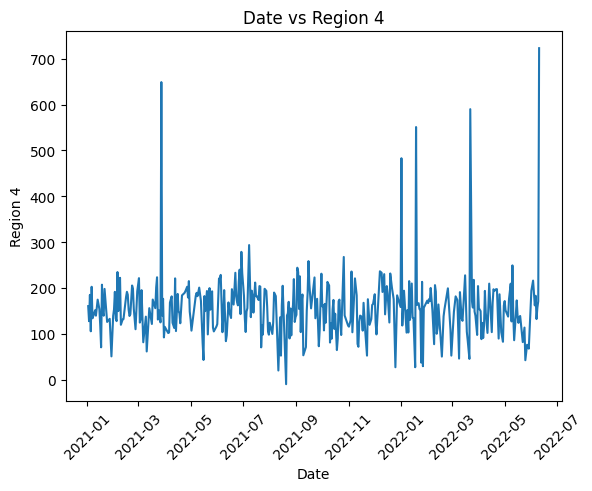

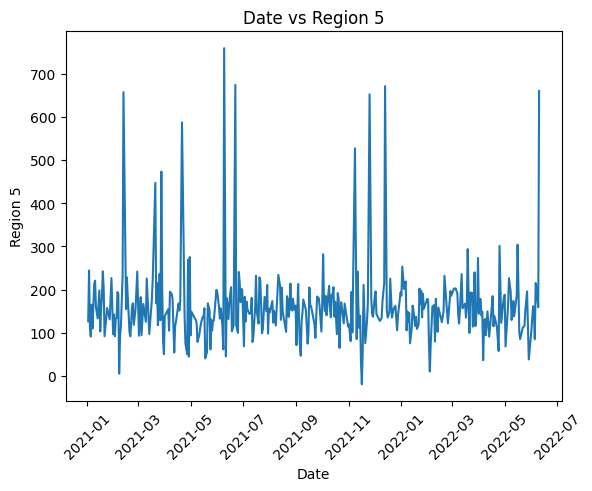

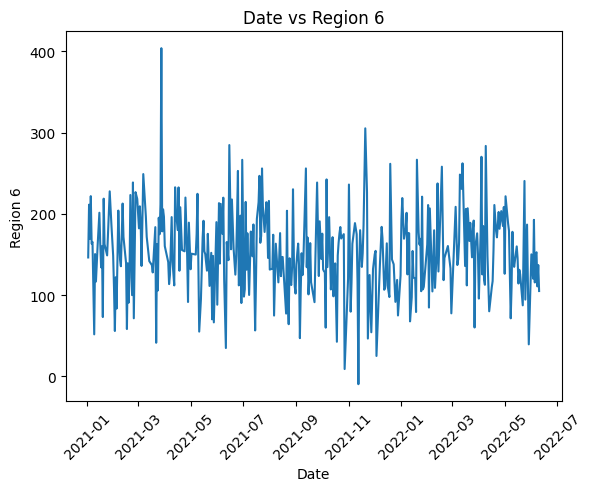

In [20]:
# plot 
for col in train.columns[1:]:
    sns.lineplot(
        data=train,
        x='Date',
        y=col
    ).set_title(f'Date vs {col}')
    plt.xticks(rotation=45)
    plt.show()

## Hebben spikes een relatie met tijd?

In [21]:
# FE - creÃ«er binary flag als het boven de 250 gaat
train['spike'] = (train[train.columns[1:]] >= 250).any(axis=1).astype(int)

In [22]:
# check
train.head()

Date    Region 1    Region 2    Region 3    Region 4    Region 5  \
436 2022-03-13  158.992329  103.595983  208.664219  128.352544  156.223776   
470 2022-04-16  148.618546  231.350464  782.000000  103.716711  158.796185   
521 2022-06-06  217.863557  181.198188   39.779913  182.967647  214.980495   
118 2021-04-29  164.808437  102.842019   53.699011  214.959871   44.470706   
162 2021-06-12  248.582870  130.898347  143.994442   96.685363  180.243516   

       Region 6  spike  
436  262.221418      1  
470  109.755732      1  
521  150.621250      0  
118  189.192559      0  
162  165.263077      0

In [23]:
# check
train[train['spike'] == 1].head(10)

Date    Region 1    Region 2    Region 3    Region 4    Region 5  \
436 2022-03-13  158.992329  103.595983  208.664219  128.352544  156.223776   
470 2022-04-16  148.618546  231.350464  782.000000  103.716711  158.796185   
323 2021-11-20  205.861833  524.000000  149.952931  104.507053   75.771865   
278 2021-10-06  255.972485  129.492414  222.723926  171.396058  140.339710   
298 2021-10-26  109.370524  110.805624  113.617779  267.659334  121.693990   
348 2021-12-15   77.246825  728.000000  210.207296  204.098908  153.194283   
351 2021-12-18  299.667941   93.189146  127.818161  124.721384  146.281411   
108 2021-04-19   79.671701  784.000000  157.779755  123.046970  174.343955   
518 2022-06-03  161.827944  155.094149  514.000000  216.114283  161.383222   
458 2022-04-04   87.140612  175.927544  208.332290   88.432124  139.711754   

       Region 6  spike  
436  262.221418      1  
470  109.755732      1  
323  305.307234      1  
278  242.433164      1  
298  175.050036      1  
348  163.715139      1  
351   97.601776      1  
108  208.137942      1  
518  120.252722      1  
458  270.290167      1

In [24]:
# maak date features
train['day'] = train['Date'].dt.dayofweek
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.year
train['monthstart'] = train['Date'].dt.is_month_start
train['monthend'] = train['Date'].dt.is_month_end
train['quarterstart'] = train['Date'].dt.is_quarter_start
train['quartereind'] = train['Date'].dt.is_quarter_end

In [25]:
# check
train.head()

Date    Region 1    Region 2    Region 3    Region 4    Region 5  \
436 2022-03-13  158.992329  103.595983  208.664219  128.352544  156.223776   
470 2022-04-16  148.618546  231.350464  782.000000  103.716711  158.796185   
521 2022-06-06  217.863557  181.198188   39.779913  182.967647  214.980495   
118 2021-04-29  164.808437  102.842019   53.699011  214.959871   44.470706   
162 2021-06-12  248.582870  130.898347  143.994442   96.685363  180.243516   

       Region 6  spike  day  month  year  monthstart  monthend  quarterstart  \
436  262.221418      1    6      3  2022       False     False         False   
470  109.755732      1    5      4  2022       False     False         False   
521  150.621250      0    0      6  2022       False     False         False   
118  189.192559      0    3      4  2021       False     False         False   
162  165.263077      0    5      6  2021       False     False         False   

     quartereind  
436        False  
470        False  
521        False  
118        False  
162        False

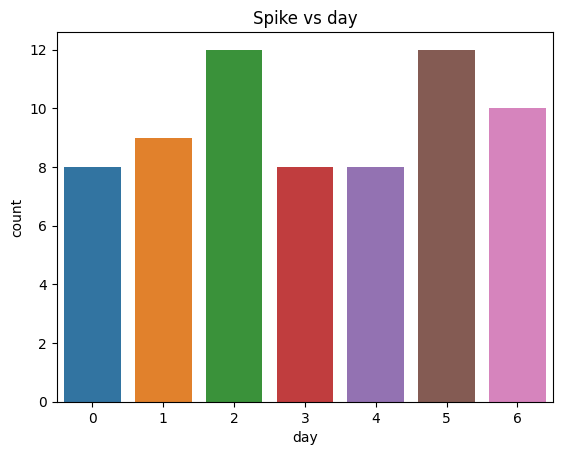

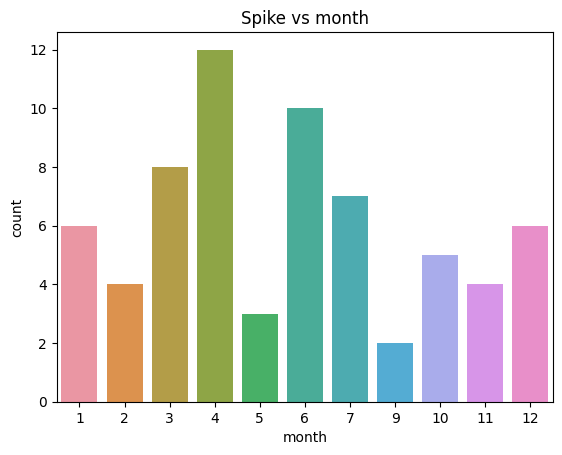

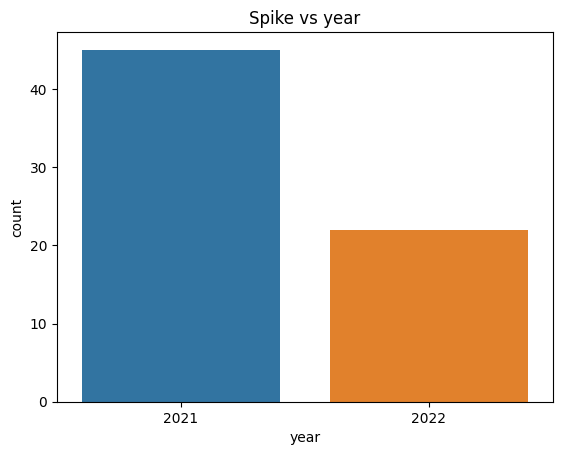

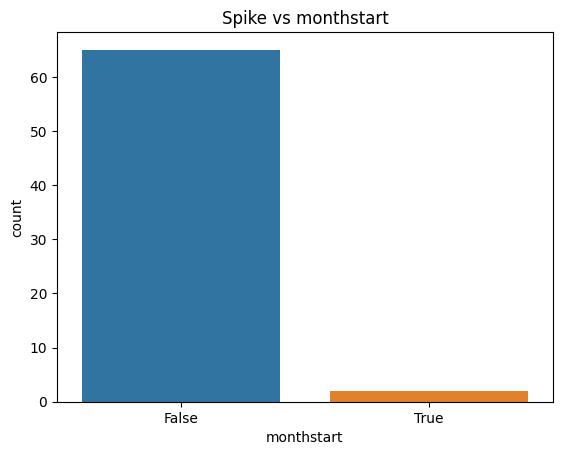

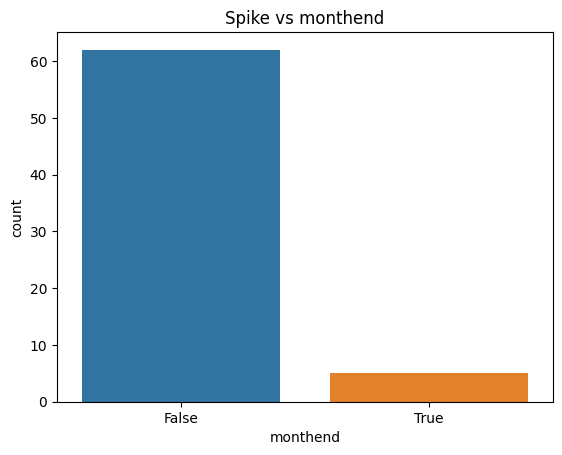

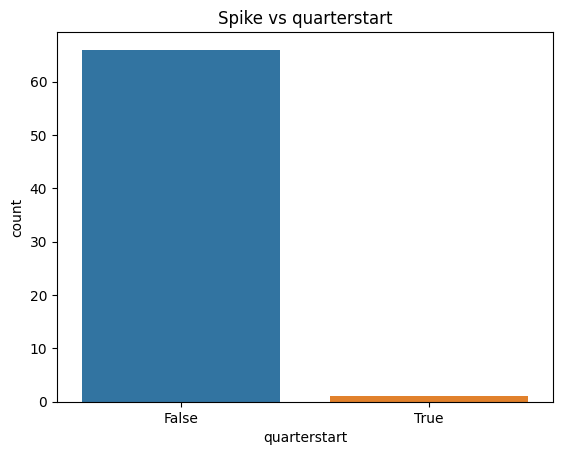

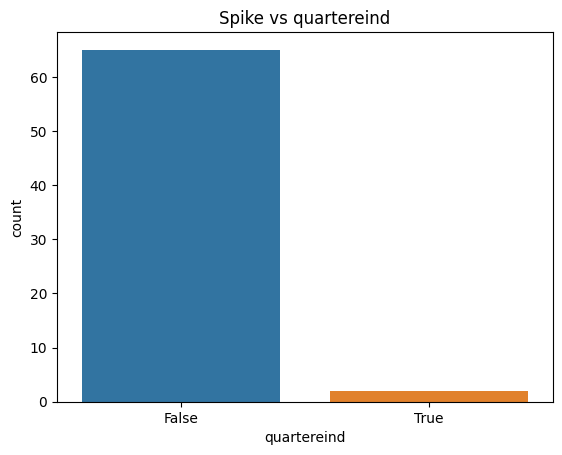

In [26]:
# visualiseer met nieuwe features
time_cols = ['day', 'month', 'year', 'monthstart', 'monthend', 'quarterstart', 'quartereind']
for col in time_cols:
    sns.countplot(
        data=train[train['spike']==1],
        x=col
    ).set_title(f'Spike vs {col}')
    plt.show()

In [27]:
# drop time gerelateerd kolommen
train = train.drop(time_cols, axis=1)

In [28]:
# check
train.head()

Date    Region 1    Region 2    Region 3    Region 4    Region 5  \
436 2022-03-13  158.992329  103.595983  208.664219  128.352544  156.223776   
470 2022-04-16  148.618546  231.350464  782.000000  103.716711  158.796185   
521 2022-06-06  217.863557  181.198188   39.779913  182.967647  214.980495   
118 2021-04-29  164.808437  102.842019   53.699011  214.959871   44.470706   
162 2021-06-12  248.582870  130.898347  143.994442   96.685363  180.243516   

       Region 6  spike  
436  262.221418      1  
470  109.755732      1  
521  150.621250      0  
118  189.192559      0  
162  165.263077      0

## Analyse Correlation

In [29]:
# correlatie
train.select_dtypes(include=[float, int]).corr()

Region 1  Region 2  Region 3  Region 4  Region 5  Region 6     spike
Region 1  1.000000 -0.021998  0.016817  0.058301  0.043939 -0.000046  0.126999
Region 2 -0.021998  1.000000  0.005645  0.035998 -0.030305  0.131186  0.363026
Region 3  0.016817  0.005645  1.000000  0.081737  0.046921  0.015633  0.300963
Region 4  0.058301  0.035998  0.081737  1.000000  0.231511  0.074267  0.237912
Region 5  0.043939 -0.030305  0.046921  0.231511  1.000000  0.012228  0.341970
Region 6 -0.000046  0.131186  0.015633  0.074267  0.012228  1.000000  0.224595
spike     0.126999  0.363026  0.300963  0.237912  0.341970  0.224595  1.000000

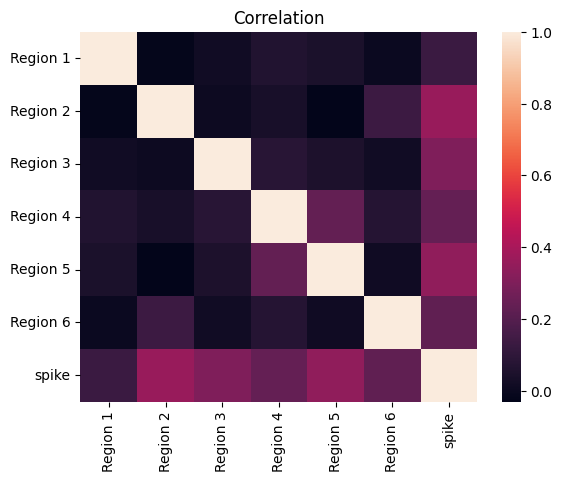

In [30]:
# heatmap
sns.heatmap(train.select_dtypes(include=[float, int]).corr()).set_title('Correlation')
plt.show()    

# 4. Data Preprocessing

## Drop Date en Voeg Spike toe aan Test Set

In [34]:
# drop kolommen
X_train = train.drop(['Date', 'spike'], axis=1)
X_test = test.drop(['Date'], axis=1)

In [35]:
# check
X_train.head()

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6
436  158.992329  103.595983  208.664219  128.352544  156.223776  262.221418
470  148.618546  231.350464  782.000000  103.716711  158.796185  109.755732
521  217.863557  181.198188   39.779913  182.967647  214.980495  150.621250
118  164.808437  102.842019   53.699011  214.959871   44.470706  189.192559
162  248.582870  130.898347  143.994442   96.685363  180.243516  165.263077

In [36]:
# check twee
X_test.head()

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6
261  174.982473  188.073353  212.564889  227.348706   90.856875  228.446842
425  155.830214  137.432916  165.569703  110.725701  123.453509  159.390772
21   116.924514   83.170321   83.832043  131.375901  213.164326   71.697156
329  189.518384  134.788869  161.219281   85.183524  124.251407  157.197199
310  136.550482  158.632527  234.408947  168.732082  173.253947   69.403637

# 5. Modelling

## Pipelines

In [37]:
# importeren
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
# importeren
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [42]:
# pipelines aanmaken
pipelines = {
    'iso':make_pipeline(StandardScaler(), IsolationForest(n_estimators=300, random_state=1234)),
    'lof':make_pipeline(StandardScaler(), LocalOutlierFactor(n_neighbors=20, novelty=True)),
    'svm':make_pipeline(StandardScaler(), OneClassSVM())
}

In [43]:
# check
pipelines['iso']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('isolationforest',
                 IsolationForest(n_estimators=300, random_state=1234))])

## Train Models

In [44]:
# train alle models
fit_models = {}
for algo, model in pipelines.items():
    print(f'Training {algo}')
    model.fit(X_train)
    fit_models[algo] = model

Training iso
Training lof
Training svm


# 6. Evaluate Models

## Scoring Matrix

In [46]:
# resultaten (van predictions per model) in df zetten
result_df = X_test.copy()
for algo, model in fit_models.items():
    res = model.predict(X_test)
    result_df[algo] = res

In [47]:
# check
result_df.head()

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6  \
261  174.982473  188.073353  212.564889  227.348706   90.856875  228.446842   
425  155.830214  137.432916  165.569703  110.725701  123.453509  159.390772   
21   116.924514   83.170321   83.832043  131.375901  213.164326   71.697156   
329  189.518384  134.788869  161.219281   85.183524  124.251407  157.197199   
310  136.550482  158.632527  234.408947  168.732082  173.253947   69.403637   

     iso  lof  svm  
261    1    1   -1  
425    1    1    1  
21     1    1   -1  
329    1    1    1  
310    1    1   -1

In [49]:
# waar labelt iso outliers
result_df[result_df['iso']==-1]

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6  \
327  179.619650  653.000000  100.155483   67.632703  324.212084  188.883103   
347  158.438903  246.000750  481.000000  126.313786  237.314565  133.014314   
515  119.088498  145.312179  701.000000   73.094460  111.089097  140.742985   
468  112.820924   68.422314  152.338513  148.959091  633.000000  122.942972   
517  236.624619  188.581893  649.000000  196.377738   98.529104  140.321670   
514  204.922210  209.984769  660.000000  125.454150  173.482150  195.324457   
123  126.402378  288.561035  503.000000  133.167646  170.421123  270.344075   

     iso  lof  svm  
327   -1   -1   -1  
347   -1   -1   -1  
515   -1   -1   -1  
468   -1   -1   -1  
517   -1   -1   -1  
514   -1   -1   -1  
123   -1   -1   -1

In [50]:
# waar labelt lof outliers
result_df[result_df['lof']==-1]

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6  \
124  129.499511  462.000000   26.431366  162.445374  202.411825  157.847851   
327  179.619650  653.000000  100.155483   67.632703  324.212084  188.883103   
512  216.038471  206.225560  187.019075  300.423898  117.290475  223.672373   
347  158.438903  246.000750  481.000000  126.313786  237.314565  133.014314   
515  119.088498  145.312179  701.000000   73.094460  111.089097  140.742985   
468  112.820924   68.422314  152.338513  148.959091  633.000000  122.942972   
181  239.112193  456.000000  206.338388  146.578865  141.358126  151.583738   
111  150.538307  105.232372   -6.073812   97.365668  131.213726   51.170400   
517  236.624619  188.581893  649.000000  196.377738   98.529104  140.321670   
514  204.922210  209.984769  660.000000  125.454150  173.482150  195.324457   
123  126.402378  288.561035  503.000000  133.167646  170.421123  270.344075   

     iso  lof  svm  
124    1   -1   -1  
327   -1   -1   -1  
512    1   -1   -1  
347   -1   -1   -1  
515   -1   -1   -1  
468   -1   -1   -1  
181    1   -1   -1  
111    1   -1   -1  
517   -1   -1   -1  
514   -1   -1   -1  
123   -1   -1   -1

In [51]:
# waar labelt svm outliers
result_df[result_df['svm']==-1]

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6  \
261  174.982473  188.073353  212.564889  227.348706   90.856875  228.446842   
21   116.924514   83.170321   83.832043  131.375901  213.164326   71.697156   
310  136.550482  158.632527  234.408947  168.732082  173.253947   69.403637   
66    89.879803  201.130424  134.432471  281.407783  159.461995  230.804372   
124  129.499511  462.000000   26.431366  162.445374  202.411825  157.847851   
..          ...         ...         ...         ...         ...         ...   
43   242.058629  156.975012  142.625262  130.416922  149.543268  174.722216   
115  145.231810  141.420973  218.935651   50.286454  138.589165  164.643271   
93   125.446549   45.943054  136.094739  148.353361  110.219904  215.959099   
362  142.876137  193.744128  111.953142  101.922023  263.122229   89.099177   
324  254.704632  212.057652  186.246838  140.483910  202.102508   61.084866   

     iso  lof  svm  
261    1    1   -1  
21     1    1   -1  
310    1    1   -1  
66     1    1   -1  
124    1   -1   -1  
..   ...  ...  ...  
43     1    1   -1  
115    1    1   -1  
93     1    1   -1  
362    1    1   -1  
324    1    1   -1  

[79 rows x 9 columns]

In [52]:
# maak spike kollom
result_df['spike'] = (result_df[result_df.columns[0:6]] >=250).any(axis=1).astype(int)
# resultaat zelfde maken als algo's, dus 1 en -1
result_df['spike'] = result_df['spike'].replace(1,-1).replace(0,1)

In [53]:
# check
result_df.head()

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6  \
261  174.982473  188.073353  212.564889  227.348706   90.856875  228.446842   
425  155.830214  137.432916  165.569703  110.725701  123.453509  159.390772   
21   116.924514   83.170321   83.832043  131.375901  213.164326   71.697156   
329  189.518384  134.788869  161.219281   85.183524  124.251407  157.197199   
310  136.550482  158.632527  234.408947  168.732082  173.253947   69.403637   

     iso  lof  svm  spike  
261    1    1   -1      1  
425    1    1    1      1  
21     1    1   -1      1  
329    1    1    1      1  
310    1    1   -1      1

In [55]:
# waar labelt iso outliers
result_df[result_df['svm']==-1]

Region 1    Region 2    Region 3    Region 4    Region 5    Region 6  \
261  174.982473  188.073353  212.564889  227.348706   90.856875  228.446842   
21   116.924514   83.170321   83.832043  131.375901  213.164326   71.697156   
310  136.550482  158.632527  234.408947  168.732082  173.253947   69.403637   
66    89.879803  201.130424  134.432471  281.407783  159.461995  230.804372   
124  129.499511  462.000000   26.431366  162.445374  202.411825  157.847851   
..          ...         ...         ...         ...         ...         ...   
43   242.058629  156.975012  142.625262  130.416922  149.543268  174.722216   
115  145.231810  141.420973  218.935651   50.286454  138.589165  164.643271   
93   125.446549   45.943054  136.094739  148.353361  110.219904  215.959099   
362  142.876137  193.744128  111.953142  101.922023  263.122229   89.099177   
324  254.704632  212.057652  186.246838  140.483910  202.102508   61.084866   

     iso  lof  svm  spike  
261    1    1   -1      1  
21     1    1   -1      1  
310    1    1   -1      1  
66     1    1   -1     -1  
124    1   -1   -1     -1  
..   ...  ...  ...    ...  
43     1    1   -1      1  
115    1    1   -1      1  
93     1    1   -1      1  
362    1    1   -1     -1  
324    1    1   -1     -1  

[79 rows x 10 columns]

## Proxy Performance

In [56]:
# importeren
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [61]:
# bereken metrics
for key in fit_models.keys():
    ytrue = result_df['spike'].replace(1,0).replace(-1,1)
    yhat = result_df[key].replace(1,0).replace(-1,1)
    precision = precision_score(ytrue, yhat)
    recall = recall_score(ytrue, yhat)
    f1 = f1_score(ytrue, yhat)
    print(f'{key}-- Precision:{precision}, Recall:{recall}, F1:{f1}')

iso-- Precision:1.0, Recall:0.30434782608695654, F1:0.4666666666666667
lof-- Precision:0.9090909090909091, Recall:0.43478260869565216, F1:0.5882352941176471
svm-- Precision:0.26582278481012656, Recall:0.9130434782608695, F1:0.4117647058823529


In [ ]:
# set y voor lof
ytrue = result_df['spike']
yhat = result_df['lof']

In [58]:
# confusion matrix
confusion_matrix(ytrue, yhat, labels=[-1,1])

array([[77, 58],
       [ 2, 21]], dtype=int64)

In [59]:
# set y voor iso
ytrue = result_df['spike']
yhat = result_df['iso']

In [60]:
# confusion matrix 
confusion_matrix(ytrue, yhat, labels=[-1,1])

array([[  7,  16],
       [  0, 135]], dtype=int64)

## Predictions

In [63]:
# predict
fit_models['lof'].predict(X_test)

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1])

## Save Models

In [65]:
# importeren
import joblib

In [66]:
# save lof model
joblib.dump(fit_models['lof'], 'localoutlierfactor.joblib')

['localoutlierfactor.joblib']

# 7. Bouwen van Gradio Checker APP

## Setup Gradio

In [67]:
!pip install gradio

     ---------------------------------------- 15.8/15.8 MB 6.0 MB/s eta 0:00:00
  Using cached aiohttp-3.8.4-cp311-cp311-win_amd64.whl (317 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 145.4/145.4 kB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 71.5/71.5 kB ? eta 0:00:00
     ------------------------------------- 199.8/199.8 kB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 50.5/50.5 kB ? eta 0:00:00
     ------------------------------------- 205.0/205.0 kB 12.2 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB ? eta 0:00:00
     ---------------------------------------- 101.4/101.4 kB ? eta 0:00:00
  Using cached multidict-6.0.4-cp311-cp311-win_amd64.whl (28 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached yarl-1.8.2-cp311-cp311-win_amd64.whl (55 kB)
  Using cached frozenlist-1.3.3-cp

  DEPRECATION: ffmpy is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
!pip show gradio

Name: gradio
Version: 3.23.0
Summary: Python library for easily interacting with trained machine learning models
Home-page: 
Author: 
Author-email: Abubakar Abid <team@gradio.app>, Ali Abid <team@gradio.app>, Ali Abdalla <team@gradio.app>, Dawood Khan <team@gradio.app>, Ahsen Khaliq <team@gradio.app>, Pete Allen <team@gradio.app>, Ã–mer Faruk Ã–zdemir <team@gradio.app>
License: 
Location: C:\Users\stefa\Documents\Fullstack ML\venv\Lib\site-packages
Requires: aiofiles, aiohttp, altair, fastapi, ffmpy, fsspec, httpx, huggingface-hub, huggingface-hub, jinja2, markdown-it-py, markupsafe, matplotlib, mdit-py-plugins, numpy, orjson, pandas, pillow, pydantic, pydub, python-multipart, pyyaml, requests, semantic-version, typing-extensions, uvicorn, websockets
Required-by: 


In [73]:
# maak predict functie
def predict(region1, region2, region3, region4, region5, region6):
    model = joblib.load('localoutlierfactor.joblib')
    yhat = model.predict(np.array([[region1, region2, region3, region4, region5, region6]]))
    return 'Weird Traffic' if yhat == -1 else 'Normal Traffic'

In [71]:
X_test.iloc[0]

Region 1    174.982473
Region 2    188.073353
Region 3    212.564889
Region 4    227.348706
Region 5     90.856875
Region 6    228.446842
Name: 261, dtype: float64

In [70]:
X_test.iloc[0].tolist()

[174.9824725, 188.0733533, 212.5648887, 227.3487056, 90.85687477, 228.4468416]

In [75]:
# test
predict(*X_test.iloc[0].tolist())

C:\Users\stefa\Documents\Fullstack ML\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Normal Traffic'

In [76]:
# test 2
predict(*result_df[result_df['lof']==-1][result_df.columns[0:6]].iloc[0].tolist())

C:\Users\stefa\Documents\Fullstack ML\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Weird Traffic'

## Bouw en Share Gradio App

In [77]:
# importeren
import gradio as gr

In [81]:
# creÃ«er interface
app = gr.Interface(
    title='AnomalieÃ«n in webverkeer ontdekken ðŸš¦',
    fn=predict, 
    inputs=[gr.Slider(0,800),gr.Slider(0,800),gr.Slider(0,800),gr.Slider(0,800),gr.Slider(0,800),gr.Slider(0,800)], 
    outputs='text'
)

In [85]:
# launch
app.launch(auth=("admin_user", "geheim_wachtwoord"), share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://f9ca10d9bf3cda61d0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [84]:
app.close()

Closing server running on port: 7860


In [86]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\stefa\Documents\Fullstack ML\venv\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
